### Word2Vec Dome

In [1]:
import os 
import csv
from gensim.models.word2vec import Word2Vec

In [2]:
## load models 
data_path = os.path.join('data','imf_160.w2v')
imf_w2v = Word2Vec.load(data_path)
model = imf_w2v.wv
vocabs = model.vocab.keys()

In [70]:
model.most_similar('imf',topn=10)

[('fund', 0.6717844605445862),
 ('staff', 0.5236257314682007),
 ('ieo', 0.4903445243835449),
 ('adb', 0.4749749004840851),
 ('executive_board', 0.4749428629875183),
 ('bretton_woods_institutions', 0.46977221965789795),
 ('weo', 0.4696206748485565),
 ('technical_assistance', 0.4681016206741333),
 ('idb', 0.4676491618156433),
 ('fiscal_affairs_department', 0.4647432565689087)]

In [15]:
from sklearn.manifold import TSNE              # visualize high dimentions data             
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
def display_closestwords_tsnescatterplot(model, word,topn,save=False):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word,topn=topn)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x+0.000005, y+0.000005), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.title('2D projection of words closest to ' + word,fontsize=20)
    if save:
        plt.savefig('w2v/'+word+'.jpg')
    plt.show()

In [67]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8

[('fund', 0.6717844605445862), ('staff', 0.5236257314682007), ('ieo', 0.4903445243835449), ('adb', 0.4749749004840851), ('executive_board', 0.4749428629875183), ('bretton_woods_institutions', 0.46977221965789795), ('weo', 0.4696206748485565), ('technical_assistance', 0.4681016206741333), ('idb', 0.4676491618156433), ('fiscal_affairs_department', 0.4647432565689087)]


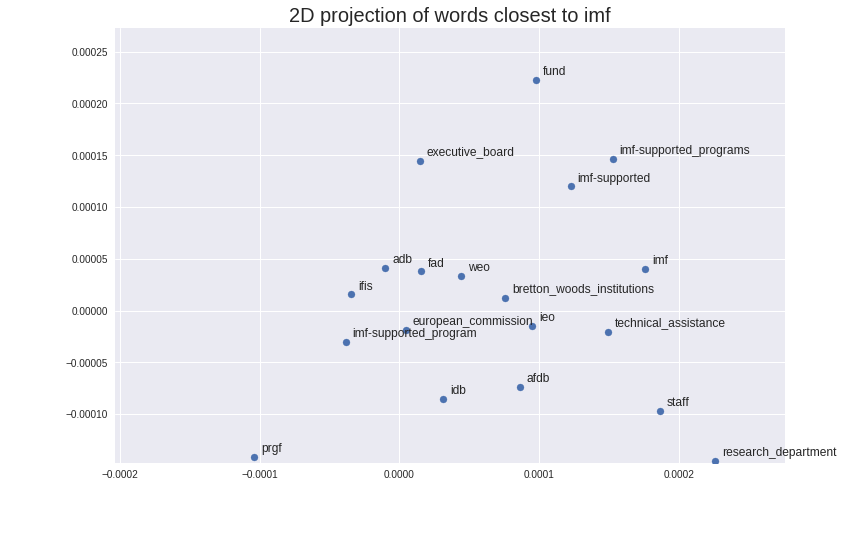

In [69]:
word = 'imf'
print(model.most_similar(word,topn=10))
display_closestwords_tsnescatterplot(model, word,20,True)